# Project – "Hot Hand"
Ariel Abramowitz 205552599<br>
Gil Weissman 322593377


## Data

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.svm import SVR, SVC

In [2]:
df = pd.read_csv('project final data.csv')
df.head(n = 5)

,MATCHUP,LOCATION,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,...,player_name,player_weight,player_height,defender_weight,defender_height,prev_3P%,prev_FT%,prev_FG%,GAME_DATE,back2back
0,"MAR 04, 2015 - CHA @ BKN",0,1,1,69,10.8,2,1.9,7.7,2,...,brian roberts,78.471416,185.42,99.790240,198.12,0.36,0.94,0.42,2015-03-04,1.0
1,"MAR 04, 2015 - CHA @ BKN",0,2,1,14,3.4,0,0.8,28.2,3,...,brian roberts,78.471416,185.42,102.511792,203.20,0.36,0.94,0.42,2015-03-04,1.0
2,"MAR 04, 2015 - CHA @ BKN",0,3,1,0,0.0,3,2.7,10.1,2,...,brian roberts,78.471416,185.42,102.511792,203.20,0.36,0.94,0.42,2015-03-04,1.0
3,"DEC 13, 2014 - CHA vs. BKN",1,1,1,5,1.9,0,2.0,26.0,3,...,brian roberts,78.471416,185.42,102.511792,203.20,0.36,0.94,0.42,2014-12-13,1.0
4,"DEC 13, 2014 - CHA vs. BKN",1,5,4,478,16.9,9,6.8,23.8,3,...,brian roberts,78.471416,185.42,102.511792,203.20,0.36,0.94,0.42,2014-12-13,1.0


In [3]:
df.groupby(by=["MATCHUP", "player_name"])
df.head(n = 5)

,MATCHUP,LOCATION,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,...,player_name,player_weight,player_height,defender_weight,defender_height,prev_3P%,prev_FT%,prev_FG%,GAME_DATE,back2back
0,"MAR 04, 2015 - CHA @ BKN",0,1,1,69,10.8,2,1.9,7.7,2,...,brian roberts,78.471416,185.42,99.790240,198.12,0.36,0.94,0.42,2015-03-04,1.0
1,"MAR 04, 2015 - CHA @ BKN",0,2,1,14,3.4,0,0.8,28.2,3,...,brian roberts,78.471416,185.42,102.511792,203.20,0.36,0.94,0.42,2015-03-04,1.0
2,"MAR 04, 2015 - CHA @ BKN",0,3,1,0,0.0,3,2.7,10.1,2,...,brian roberts,78.471416,185.42,102.511792,203.20,0.36,0.94,0.42,2015-03-04,1.0
3,"DEC 13, 2014 - CHA vs. BKN",1,1,1,5,1.9,0,2.0,26.0,3,...,brian roberts,78.471416,185.42,102.511792,203.20,0.36,0.94,0.42,2014-12-13,1.0
4,"DEC 13, 2014 - CHA vs. BKN",1,5,4,478,16.9,9,6.8,23.8,3,...,brian roberts,78.471416,185.42,102.511792,203.20,0.36,0.94,0.42,2014-12-13,1.0


In [4]:
list(df.columns)

['MATCHUP',
 'LOCATION',
 'SHOT_NUMBER',
 'PERIOD',
 'GAME_CLOCK',
 'SHOT_CLOCK',
 'DRIBBLES',
 'TOUCH_TIME',
 'SHOT_DIST',
 'PTS_TYPE',
 'CLOSEST_DEFENDER',
 'CLOSE_DEF_DIST',
 'FGM',
 'PTS',
 'player_name',
 'player_weight',
 'player_height',
 'defender_weight',
 'defender_height',
 'prev_3P%',
 'prev_FT%',
 'prev_FG%',
 'GAME_DATE',
 'back2back']

In [5]:
Prev_FGM = []
for index, row in df.iterrows():
  if index == 0:
    Prev_FGM.append(None)
    continue
  if df.iloc[index-1]['MATCHUP'] == row['MATCHUP'] and df.iloc[index-1]['player_name'] == row['player_name']:
    Prev_FGM.append(df.iloc[index-1]['FGM'])
  else:
    Prev_FGM.append(None)
df['Prev_FGM'] = Prev_FGM
df.head(n = 5)

,MATCHUP,LOCATION,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,...,player_weight,player_height,defender_weight,defender_height,prev_3P%,prev_FT%,prev_FG%,GAME_DATE,back2back,Prev_FGM
0,"MAR 04, 2015 - CHA @ BKN",0,1,1,69,10.8,2,1.9,7.7,2,...,78.471416,185.42,99.790240,198.12,0.36,0.94,0.42,2015-03-04,1.0,NaN
1,"MAR 04, 2015 - CHA @ BKN",0,2,1,14,3.4,0,0.8,28.2,3,...,78.471416,185.42,102.511792,203.20,0.36,0.94,0.42,2015-03-04,1.0,1.0
2,"MAR 04, 2015 - CHA @ BKN",0,3,1,0,0.0,3,2.7,10.1,2,...,78.471416,185.42,102.511792,203.20,0.36,0.94,0.42,2015-03-04,1.0,0.0
3,"DEC 13, 2014 - CHA vs. BKN",1,1,1,5,1.9,0,2.0,26.0,3,...,78.471416,185.42,102.511792,203.20,0.36,0.94,0.42,2014-12-13,1.0,NaN
4,"DEC 13, 2014 - CHA vs. BKN",1,5,4,478,16.9,9,6.8,23.8,3,...,78.471416,185.42,102.511792,203.20,0.36,0.94,0.42,2014-12-13,1.0,1.0


In [6]:
print(df.iloc[-1])
df.shape

MATCHUP             JAN 05, 2015 - NYK @ MEM
LOCATION                                   0
SHOT_NUMBER                                4
PERIOD                                     3
GAME_CLOCK                               705
SHOT_CLOCK                              10.0
DRIBBLES                                   2
TOUCH_TIME                               3.4
SHOT_DIST                                4.2
PTS_TYPE                                   2
CLOSEST_DEFENDER              jarnell stokes
CLOSE_DEF_DIST                           0.4
FGM                                        1
PTS                                        2
player_name                     cole aldrich
player_weight                     114.758776
player_height                         210.82
defender_weight                    115.66596
defender_height                       205.74
prev_3P%                                 0.0
prev_FT%                               0.867
prev_FG%                               0.541
GAME_DATE 

(102692, 25)

In [7]:
df = df[df['Prev_FGM'].notna()]

In [8]:
df.shape

(59552, 25)

In [9]:
corr = df.corr()
corr['FGM']

LOCATION           0.003869
SHOT_NUMBER       -0.018129
PERIOD            -0.019566
GAME_CLOCK         0.013559
SHOT_CLOCK         0.018683
DRIBBLES          -0.035922
TOUCH_TIME        -0.046570
SHOT_DIST         -0.181106
PTS_TYPE          -0.113880
CLOSE_DEF_DIST     0.003930
FGM                1.000000
PTS                0.970698
player_weight      0.050938
player_height      0.046467
defender_weight    0.025027
defender_height    0.023844
prev_3P%          -0.034715
prev_FT%          -0.034603
prev_FG%           0.064674
back2back          0.000589
Prev_FGM          -0.002032
Name: FGM, dtype: float64

[Text(0.5, 1.0, 'Correlations Heat Map')]

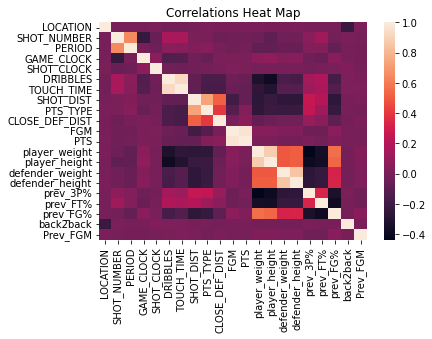

In [10]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns).set(title='Correlations Heat Map')


In [11]:
df.shape

(59552, 25)

In [12]:
df2 = pd.read_csv('project final data.csv')
dfg = df2.groupby(by=["MATCHUP", "player_name"])
print(dfg.ngroups)
dfg = df2.groupby(by=["MATCHUP"])
print(dfg.ngroups)
dfg = df2.groupby(by=["player_name"])
print(dfg.ngroups)


11290
1808
219


In [13]:
print(round(df[df['Prev_FGM'] == 1].shape[0]/df.shape[0]*100,2))
print(round(df[df['Prev_FGM'] == 0].shape[0]/df.shape[0]*100,2))

45.06
54.94


## Bootstrap

In [14]:
def BS_sample(df, n):
  return df.iloc[np.random.randint(n, size=n)]

## Models

### IPW

In [15]:
def calc_propensity(x, t, max_iter=100):
    log_reg = LogisticRegression(max_iter=max_iter).fit(x, t)
    return log_reg.predict_proba(x)[:,1]

In [16]:
def ipw_calc_new(propensity, t, y):
    val1, val2, val3, val4 = 0,0,0,0
    t = t.to_numpy()
    y = y.to_numpy()
    # val1 = 
    for i in range(len(propensity)):
        val1 += t[i]*y[i]/propensity[i]
        val2 += t[i]/propensity[i]
        val3 += (1-t[i])*y[i]/(1-propensity[i])
        val4 += (1-t[i])/(1-propensity[i])
    ATE = val1/val2-val3/val4
    return ATE
  
def ipw_calc(propensity, t, y):
    t = t.to_numpy()
    y = y.to_numpy()
    val1 = np.sum(t*y/propensity)
    val2 = np.sum(t/propensity)
    val3 = np.sum((1-t)*y/(1-propensity))
    val4 = np.sum((1-t)/(1-propensity))
    ATE = val1/val2-val3/val4
    return ATE

### S-Learner

In [17]:
def slearner_calc_new(model, x, t, y):
  
    x["T"] = t
    model.fit(x.to_numpy(), y.to_numpy())
    ATE_sum = 0
    counter = 0
    for i, row in x.iterrows():
      pred_T1 = model.predict([row.to_numpy()])[0]
      row2 = row.copy()
      row2["T"] = 0
      pred_T0 = model.predict([row2.to_numpy()])[0]
      ATE_sum += pred_T1 - pred_T0
      counter += 1
    ATE = ATE_sum/counter
    return ATE

def slearner_calc2(model, x, t, y):
    x["T"] = t
    model.fit(x.to_numpy(), y.to_numpy())
    def help(row):
      pred_T1 = model.predict([row.to_numpy()])[0]
      row2 = row.copy()
      row2["T"] = 0
      pred_T0 = model.predict([row2.to_numpy()])[0]
      return pred_T1 - pred_T0 
    ITE = x.apply(help, axis=1)
    ATE = np.mean(ITE)
    return ATE

### T-Learner

In [18]:
def tlearner_calc_new(models, x, t, y):
    model1, model0 = models
    x["T"] = t
    x["Y"] = y
    x1 = x[x["T"]==1]
    x0 = x[x["T"]==0]
    y1 = x1['Y']
    y0 = x0['Y']
    model1.fit(x1.drop(['T','Y'],axis=1).to_numpy(), y1.to_numpy())
    model0.fit(x0.drop(['T','Y'],axis=1).to_numpy(), y0.to_numpy())
    pred_T1 = x.drop(['T','Y'],axis=1).apply(lambda row: model1.predict([row.to_numpy()])[0], axis=1)
    pred_T0 = x.drop(['T','Y'],axis=1).apply(lambda row: model0.predict([row.to_numpy()])[0], axis=1)
    ITE = pred_T1 - pred_T0
    return ITE.mean()   

### Matching

In [19]:
from sklearn.neighbors import NearestNeighbors

def matching_calc_new(x, t, y, n=1):
    x = (x-x.min(axis=0))\
      /(x.max(axis=0)-x.min(axis=0)+0.0001)
    x["T"] = t
    x["Y"] = y
    x1 = x[x["T"] == 1]
    y1 = x1['Y'].to_numpy()
    x0 = x[x["T"] == 0]
    y0 = x0['Y'].to_numpy()
    
    knn0 = NearestNeighbors(n_neighbors=n).fit(x0.drop(columns=['Y','T']).to_numpy())
    knn1 = NearestNeighbors(n_neighbors=n).fit(x1.drop(columns=['Y','T']).to_numpy())

    ITE1 = list(x1.apply(lambda row: row['Y'] - y0[knn0.kneighbors([row.drop(['Y','T'])])[1][0]][0], axis=1))
    ITE2 = list(x0.apply(lambda row: -row['Y'] + y1[knn1.kneighbors([row.drop(['Y','T'])])[1][0]][0], axis=1))
    ITE = ITE1 + ITE2
    return np.mean(ITE)

## Model Selection

In [ ]:
k_fold = 3
cross_val_set = df.head(df.shape[0] - df.shape[0]%k_fold)
y = cross_val_set['FGM']
t = cross_val_set['Prev_FGM']
x = cross_val_set.drop(columns=["FGM", "Prev_FGM", "player_name", "CLOSEST_DEFENDER", "GAME_DATE", "MATCHUP", "PTS"])
x = pd.get_dummies(x)
x["T"] = t
x["Y"] = y
x1 = x[x["T"] == 1]
y1 = x1['Y'].to_numpy()
x0 = x[x["T"] == 0]
y0 = x0['Y'].to_numpy()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
# cross validation
models = []
models.append(("Logistic Regression",LogisticRegression(max_iter=10000),'predict'))
models.append(("Decision Tree",DecisionTreeClassifier(),'predict'))
models.append(("Gradient Boosting",GradientBoostingClassifier(random_state=0),'predict'))
models.append(("Random Forest",RandomForestClassifier(random_state=0),'predict'))
models.append(("Gaussian NB",GaussianNB(),'predict'))

S_results = []
T1_results = []
T0_results = []
propensity_results = []
names = []
for name,model,method in models:
    names.append(name)
    S_prediction = cross_val_predict(model, x.drop(["Y"], axis=1), y, cv=3, method=method)
    # S_prediction = S_prediction[:,1] if method == 'predict_proba' else S_prediction     
    S_result = np.mean(S_prediction==y)
    # S_result = cross_val_score(model, x.drop(["Y"], axis=1), y,  cv=3, scoring='neg_mean_squared_error')
    S_results.append(S_result)
    # T1_result = cross_val_score(model, x1.drop(["Y","T"], axis=1), y1,  cv=3, scoring='neg_mean_squared_error')
    T1_prediction = cross_val_predict(model, x1.drop(["Y","T"], axis=1), y1, cv=3, method=method)
    # T1_prediction = T1_prediction[:,1] if method == 'predict_proba' else T1_prediction     
    T1_result = np.mean(T1_prediction==y1)
    T1_results.append(T1_result)
    # T0_result = cross_val_score(model, x0.drop(["Y","T"], axis=1), y0,  cv=3, scoring='neg_mean_squared_error')
    T0_prediction = cross_val_predict(model, x0.drop(["Y","T"], axis=1), y0, cv=3, method=method)
    # T0_prediction = T0_prediction[:,1] if method == 'predict_proba' else T0_prediction     
    T0_result = np.mean(T0_prediction==y0)
    T0_results.append(T0_result)
    if name not in ['Logistic Regression', 'Gaussian NB']:
        propensity_results.append('not measured')
        continue
    # propensity_result = cross_val_score(model, x.drop(["Y","T"], axis=1), t,  cv=3, scoring='neg_mean_squared_error')
    propensity_prediction = cross_val_predict(model, x.drop(["Y","T"], axis=1), t, cv=3, method=method)
    # propensity_prediction = propensity_prediction[:,1] if method == 'predict_proba' else propensity_prediction     
    propensity_result = np.mean(propensity_prediction==t)
    # S_result = cross_val_score(model, x.drop(["Y"], axis=1), y,  cv=3, scoring='neg_mean_squared_error')
    propensity_results.append(propensity_result)

for i in range(len(names)):
    print("S model CV score ",names[i],S_results[i])
for i in range(len(names)):
    print("T1 model CV score ",names[i],T1_results[i])
for i in range(len(names)):
    print("T0 model CV score ", names[i],T0_results[i])
for i in range(len(names)):
    print("propensity model CV score ",names[i],propensity_results[i])

S model CV score  Logistic Regression 0.6056255247691016
S model CV score  Decision Tree 0.5348614609571788
S model CV score  Gradient Boosting 0.6126448362720402
S model CV score  Random Forest 0.6032241813602015
S model CV score  Gaussian NB 0.5655079764903442
T1 model CV score  Logistic Regression 0.6063203398673325
T1 model CV score  Decision Tree 0.5321606916598345
T1 model CV score  Gradient Boosting 0.6152269508832079
T1 model CV score  Random Forest 0.6030409182380562
T1 model CV score  Gaussian NB 0.5637996571513751
T0 model CV score  Logistic Regression 0.6052695928597628
T0 model CV score  Decision Tree 0.5334087296735542
T0 model CV score  Gradient Boosting 0.6164567795574031
T0 model CV score  Random Forest 0.6036495904144761
T0 model CV score  Gaussian NB 0.5682846313730285
propensity model CV score  Logistic Regression 0.5496053736356004
propensity model CV score  Decision Tree not measured
propensity model CV score  Gradient Boosting not measured
propensity model CV sco

## Results

In [62]:
# df_new = df.head(10000).drop(columns=['MATCHUP', 'GAME_DATE'])
df_new = df.copy()
y = df_new['FGM']
t = df_new['Prev_FGM']
x = df_new.drop(columns=["FGM", "Prev_FGM", "player_name", "CLOSEST_DEFENDER","PTS", "GAME_DATE", "MATCHUP"])
x = pd.get_dummies(x)
x = (x-x.min(axis=0))\
      /(x.max(axis=0)-x.min(axis=0)+0.0001)
x.shape

(59552, 18)

In [63]:
propensity_df = calc_propensity(x, t, max_iter=3000)
propensity_df

array([0.43762202, 0.41999987, 0.43064595, ..., 0.48268661, 0.5039327 ,
       0.49004484])

In [64]:
ipw_val = ipw_calc(propensity_df, t, y)
print("ATE calculated by IPW is", ipw_val)

ATE calculated by IPW is 0.0014205301784644964


In [65]:
model_slearner = GradientBoostingClassifier(random_state=0)
slearner_val = slearner_calc2(model_slearner, x, t, y)
print("ATE calculated by S-Learner is", slearner_val)

ATE calculated by S-Learner is 0.0


In [66]:
models_tlearner = (GradientBoostingClassifier(random_state=0),GradientBoostingClassifier(random_state=0))
tlearner_val = tlearner_calc_new(models_tlearner, x, t, y)
print("ATE calculated by T-Learner is", tlearner_val)

ATE calculated by T-Learner is -0.022098334228909187


In [67]:
matching_val = matching_calc_new(x, t, y)
print("ATE calculated by matching is", matching_val)

ATE calculated by matching is -0.02646426652337453


Text(0.5, 1.0, 'Histogram of propensity scores')

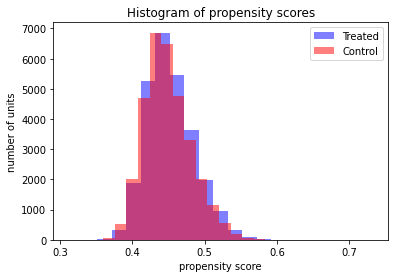

In [ ]:
#Plot histogram of TRUE propensity scores
treat_plt = plt.hist([p for (p,treatment) in zip(propensity_df, t) if treatment==1], fc=(0, 0, 1, 0.5),bins=20,label='Treated')
cont_plt = plt.hist([p for (p,treatment) in zip(propensity_df, t) if treatment==0],fc=(1, 0, 0, 0.5),bins=20,label='Control')
plt.legend();
plt.xlabel('propensity score');
plt.ylabel('number of units');
plt.title('Histogram of propensity scores')

In [ ]:
def calc_confidence_interval(model_results):
  a = np.percentile(model_results, 2.5)
  b = np.percentile(model_results, 97.5)
  return a,b

In [ ]:
# Bootstrap
prop_list = []
ipw_list = []

for i in range(100):
  df_BS = BS_sample(df, 50000).reset_index(drop=True)
  y1 = df_BS['FGM']
  t1 = df_BS['Prev_FGM']
  x1 = df_BS.drop(columns=["FGM", "Prev_FGM", "player_name", "CLOSEST_DEFENDER", 'PTS', "GAME_DATE", "MATCHUP"])
  x1 = pd.get_dummies(x1)
  x1 = (x1-x1.min(axis=0))\
        /(x1.max(axis=0)-x1.min(axis=0)+0.0001)
  
  propensity_df = calc_propensity(x1, t1, max_iter=1000)
  prop_list.append(propensity_df)

  ipw_val1 = ipw_calc(propensity_df, t1, y1)
  # print("ATE calculated by IPW for data1 is", ipw_val1)
  ipw_list.append(ipw_val1)

a_ipw, b_ipw = calc_confidence_interval(ipw_list)
print(round(a_ipw,3), round(b_ipw,3), abs(round(a_ipw,3) - round(b_ipw,3)))

-0.01 0.008 0.018000000000000002


In [ ]:
# Bootstrap
slearner_list = []

for i in range(100):
  df_BS = BS_sample(df, 50000).reset_index(drop=True)
  y1 = df_BS['FGM']
  t1 = df_BS['Prev_FGM']
  x1 = df_BS.drop(columns=["FGM", "Prev_FGM", "player_name", "CLOSEST_DEFENDER", 'PTS', "GAME_DATE", "MATCHUP"])
  x1 = pd.get_dummies(x1)
  x1 = (x1-x1.min(axis=0))\
        /(x1.max(axis=0)-x1.min(axis=0)+0.0001)

  model_slearner1 = GradientBoostingClassifier(random_state=0)
  slearner_val1 = slearner_calc2(model_slearner1, x1, t1, y1)
  # print("ATE calculated by S-Learner for data1 is", slearner_val1)
  slearner_list.append(slearner_val1)

a_slearner, b_slearner = calc_confidence_interval(slearner_list)
print(round(a_slearner,3), round(b_slearner,3), abs(round(a_slearner,3) - round(b_slearner,3)))

-0.002 0.001 0.003


In [ ]:
# Bootstrap
tlearner_list = []

for i in range(100):
  df_BS = BS_sample(df, 50000).reset_index(drop=True)
  y1 = df_BS['FGM']
  t1 = df_BS['Prev_FGM']
  x1 = df_BS.drop(columns=["FGM", "Prev_FGM", "player_name", "CLOSEST_DEFENDER", 'PTS', "GAME_DATE", "MATCHUP"])
  x1 = pd.get_dummies(x1)
  x1 = (x1-x1.min(axis=0))\
        /(x1.max(axis=0)-x1.min(axis=0)+0.0001)

  models_tlearner1 = (GradientBoostingClassifier(random_state=0),
                     GradientBoostingClassifier(random_state=0))
  tlearner_val1 = tlearner_calc_new(models_tlearner1, x1, t1, y1)
  # print("ATE calculated by T-Learner for data1 is", tlearner_val1)
  tlearner_list.append(tlearner_val1)

a_tlearner, b_tlearner = calc_confidence_interval(tlearner_list)
print(round(a_tlearner,3), round(b_tlearner,3), abs(round(a_tlearner,3) - round(b_tlearner,3)))

-0.039 0.007 0.046


In [ ]:
# Bootstrap
matching_list = []

for i in range(100):
  # if i%10==0:
  #     print(f"{i+1}th iteration")
  df_BS = BS_sample(df, 10000).reset_index(drop=True)
  y1 = df_BS['FGM']
  t1 = df_BS['Prev_FGM']
  x1 = df_BS.drop(columns=["FGM", "Prev_FGM", "player_name", "CLOSEST_DEFENDER", 'PTS', "GAME_DATE", "MATCHUP"])
  x1 = pd.get_dummies(x1)
  x1 = (x1-x1.min(axis=0))\
        /(x1.max(axis=0)-x1.min(axis=0)+0.0001)
        
  matching_val1 = matching_calc_new(x1, t1, y1)
  # print("ATE calculated by matching for data1 is", matching_val1)
  matching_list.append(matching_val1)

a_matching, b_matching = calc_confidence_interval(matching_list)
print(round(a_matching,3), round(b_matching,3), abs(round(a_matching,3) - round(b_matching,3)))

-0.042 -0.005 0.037000000000000005


In [ ]:
print(round(a_ipw,3), round(b_ipw,3), abs(round(a_ipw,3) - round(b_ipw,3)))
print(round(a_slearner,3), round(b_slearner,3), abs(round(a_slearner,3) - round(b_slearner,3)))
print(round(a_tlearner,3), round(b_tlearner,3), abs(round(a_tlearner,3) - round(b_tlearner,3)))
print(round(a_matching,3), round(b_matching,3), abs(round(a_matching,3) - round(b_matching,3)))

-0.01 0.008 0.018000000000000002
-0.002 0.001 0.003
-0.039 0.007 0.046
-0.042 -0.005 0.037000000000000005


In [ ]:
print(ipw_list)
print(slearner_list)
print(tlearner_list)
print(matching_list)

[-0.005831933038109582, -0.008960211973434273, -0.00683501827881966, 0.006143264451626107, 0.00554633158901785, -0.0023237449621100748, -0.009559849102023898, 0.003072447675264822, -0.0028220523598390113, 0.0008908502936281204, 0.006823006609554649, 0.0005529038058449398, 0.003385565589843098, 0.003443518597613382, 8.320089905616834e-05, -0.0004873115142682849, 0.0035225039099108235, -0.005311695086630375, 0.0028647974001848597, 0.00047012828934067663, -0.0014374976923438587, 0.0024298364317958954, 0.001640669449854859, -0.0011560973852006162, -0.004851204522076269, 0.0027514677298703383, 0.0024018698214635648, -0.0010245994058215024, 0.007998628165086341, -0.001100685480408481, -0.0036543973234605676, -0.0028160949564883797, 0.0028891850480797787, -0.002741917818327555, -0.0021555222236730454, -0.0002252655982932228, 0.0012637709675156206, -0.0010567969553619827, 0.00480739908947353, -0.00201845175826465, 0.002203914463836998, 0.005336433102079208, 0.003816805014764335, 0.000365362340

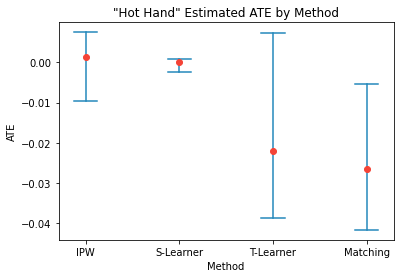

In [ ]:
import matplotlib.pyplot as plt
import statistics
from math import sqrt

def plot_confidence_interval(x, estimation, values, color='#2187bb', horizontal_line_width=0.25):
    
    left = x - horizontal_line_width / 2
    bottom, top = calc_confidence_interval(values)
    right = x + horizontal_line_width / 2
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, estimation, 'o', color='#f44336')

def plot_confidence_interval3(x, estimation, values, z=1.96, color='#2187bb', horizontal_line_width=0.24):

    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    confidence_interval = z * stdev / sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = estimation - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = estimation + confidence_interval

    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, estimation, 'o', color='#f44336')

plt.xticks([1, 2, 3, 4], ['IPW', 'S-Learner', 'T-Learner', 'Matching'])
plt.title('"Hot Hand" Estimated ATE by Method')
plot_confidence_interval(1, ipw_val, ipw_list)
plot_confidence_interval(2, slearner_val, slearner_list)
plot_confidence_interval(3, tlearner_val, tlearner_list)
plot_confidence_interval(4, matching_val, matching_list)
plt.xlabel('Method');
plt.ylabel('ATE');
plt.show()

# plt.xticks([1, 2, 3, 4], ['IPW', 'S-Learner', 'T-Learner', 'Matching'])
# plt.title('Confidence Interval')
# plot_confidence_interval3(1, ipw_val, ipw_list)
# plot_confidence_interval3(2, slearner_val, slearner_list)
# plot_confidence_interval3(3, tlearner_val, tlearner_list)
# plot_confidence_interval3(4, matching_val, matching_list)
# plt.show()


## Sensitivity Analysis
We calculate tipping point for each ATE estimation with unmeasured confounding bias.

In [68]:
df_new = df.copy()
y = df_new['FGM']
t = df_new['Prev_FGM']
x = df_new.drop(columns=["FGM", "Prev_FGM", "player_name", "CLOSEST_DEFENDER","PTS", "GAME_DATE", "MATCHUP"])
x = pd.get_dummies(x)
x = (x-x.min(axis=0))\
      /(x.max(axis=0)-x.min(axis=0)+0.0001)
x["T"] = t
x["Y"] = y
x1 = x[x["T"] == 1]
y1 = x1['Y'].to_numpy()
x0 = x[x["T"] == 0]
y0 = x0['Y'].to_numpy()

In [69]:
conditional_y1 = LogisticRegression(max_iter=3000).fit(x1.drop(columns=["Y","T"]), y1)
conditional_y0 = LogisticRegression(max_iter=3000).fit(x0.drop(columns=["Y","T"]), y0)
def stdev(model, x):
    e_y_hat = model.predict_proba(x)[:,1]
    var_y_hat = e_y_hat - e_y_hat**2
    return np.sqrt(var_y_hat)

In [76]:
calc_bias_1 = stdev(conditional_y1,x.drop(columns=["Y","T"])) * (1 - propensity_df)
calc_bias_0 = stdev(conditional_y0,x.drop(columns=["Y","T"])) * propensity_df
bias1 = calc_bias_1.mean()
bias0 = calc_bias_0.mean()
def calc_tipping_point(ATE):
    tipping_point = -ATE / (bias1 + bias0)
    return tipping_point

In [77]:
print("Tipping point calculated for IPW is", calc_tipping_point(ipw_val))
print("Tipping point calculated for S-learner is", calc_tipping_point(slearner_val))
print("Tipping point calculated for T-learner is", calc_tipping_point(tlearner_val))
print("Tipping point calculated for matching is", calc_tipping_point(matching_val))

Tipping point calculated for IPW is -0.0029341690543435027
Tipping point calculated for S-learner is -0.0
Tipping point calculated for T-learner is 0.04564510450393482
Tipping point calculated for matching is 0.05466313426914992
